In [1]:
import yaml
import pickle
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import constants, units

from scripts import *

plt.rcParams['font.size'] = 16
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'T_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:57: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_uv_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'R_star' in star_keys:
/Users/ar

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/rsnow5_inner/model_inputs.yaml
rsnow5_inner
saved star spectrum
cell centers :  [0.05136586 0.05417222 0.0571319  0.06025327 0.06354519 0.06701695
 0.0706784  0.07453988 0.07861234 0.08290729 0.0874369  0.09221398
 0.09725205 0.10256538 0.108169   0.11407877 0.12031141 0.12688458
 0.13381687 0.1411279  0.14883836 0.15697009 0.16554608 0.17459063
 0.18412932 0.19418915 0.20479859 0.21598768 0.22778808 0.24023319
 0.25335823 0.26720036 0.28179874 0.2971947  0.31343181 0.33055603
 0.34861583 0.36766232 0.3877494  0.40893393 0.43127587 0.45483845
 0.47968837 0.50589595 0.53353537 0.56268486 0.59342692 0.62584856
 0.66004154 0.69610264 0.73413393 0.77424304 0.8165435  0.86115502
 0.90820388 0.95782323 1.01015352 1.06534285 1.12354742 1.18493198
 1.24967026 1.31794549 1.38995091 1.46589032 1.54597865 1.63044257
 1.71952114 1.81346648 1.91254449 2.01703559 2.12723551 2.24345616
 2.36602649 2.49529339 2.63162274 2.77540038 2.92

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:49: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:50: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:53: MatplotlibDeprecationWarning: You are modifying the state of a globa

plotted rsnow5_inner summary figure


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:128: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:129: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:132: MatplotlibDeprecationWarning: You are modifying the state of a gl

plotted rsnow5_inner summary figure


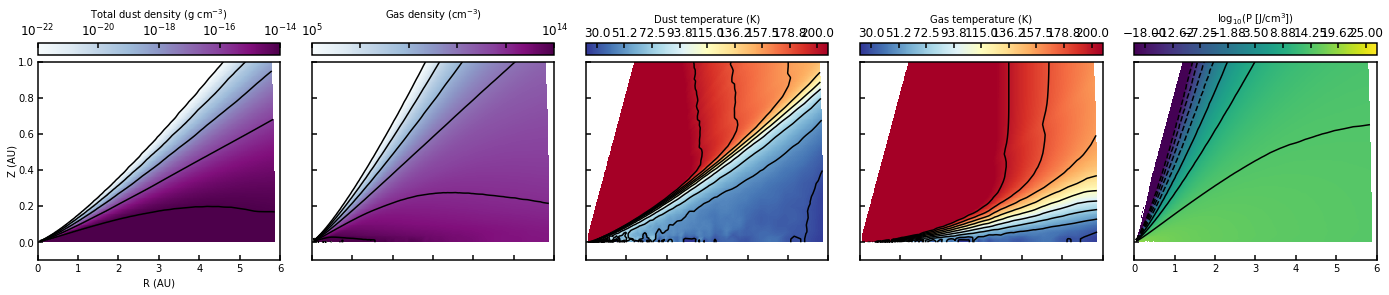

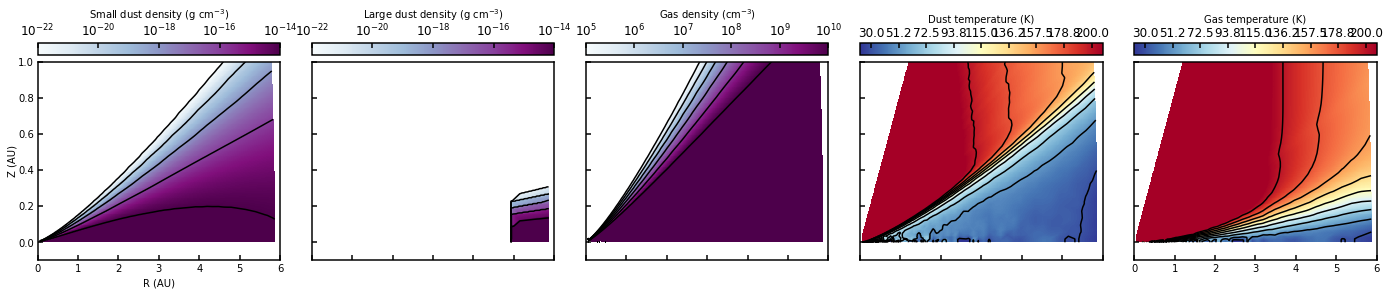

In [2]:
norm = setup(PATH=path, models=['rsnow5_inner'], uv=False, run=True,
             disk_params={'r_in':0.05, 'r_out':6.0, 'r_peb':6.0, 'r_snow':5},
             grid_params={'ntheta':85, 'nr':90})

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline/model_inputs.yaml
baseline
plotted baseline summary figure
plotted baseline summary figure


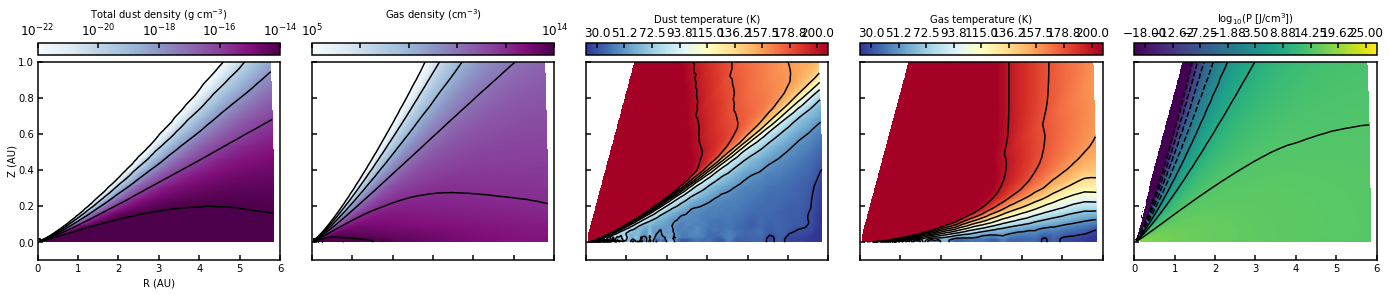

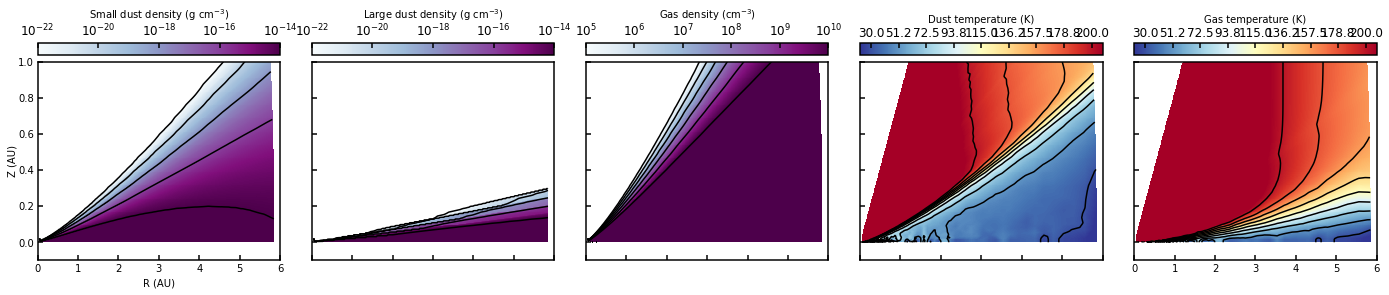

In [4]:
norm = setup(PATH=path, models=['baseline'], uv=False, run=False,
             disk_params={'r_in':0.05, 'r_out':6.0, 'r_peb':6.0, 'r_snow':0},
             grid_params={'ntheta':85, 'nr':90})

In [5]:
base_path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline'
with open(os.path.join(base_path,'diskdata.pkl'), 'rb') as infile:
        diskinp = pickle.load(infile)
        ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze = diskinp
pgas = pressure_profile(dgas*units.g/units.cm**3,
                        tgas*units.K).value

In [7]:
snow_path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/rsnow5_inner'
with open(os.path.join(base_path,'diskdata.pkl'), 'rb') as infile:
        diskinp = pickle.load(infile)
        s_ddustsm, s_ddustlg, s_tdustsm, s_tdustlg, s_dgas, s_tgas, s_re, s_ze = diskinp
s_pgas = pressure_profile(dgas*units.g/units.cm**3,
                        tgas*units.K).value

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3, 
                                             figsize=(18,14), 
                                             sharex=True, sharey=True)
fig.set_facecolor('w')

im = ax1.imshow(np.rot90(np.log10(ddustsm)), vmin=-100, vmax=-14)
fig.colorbar(im, ax=ax1, location='top', label='Small Grain Density [g/cm$^{-3}$]')
ax1.set_ylabel('No Snow Line')
im = ax2.imshow(np.rot90(np.log10(ddustlg)), vmin=-100, vmax=-14)
fig.colorbar(im, ax=ax2, location='top', label='Large Grain Density [g/cm$^{-3}$]')

ax3.set_ylabel('Snow Line @ 5AU')
ax3.imshow(np.rot90(np.log10(s_ddustsm)), vmin=-100, vmax=-14)
im = ax4.imshow(np.rot90(np.log10(s_ddustlg)), vmin=-100, vmax=-14)

ax5.set_ylabel('Difference')
ax5.imshow(np.rot90(np.log10(s_ddustsm)/np.log10(ddustsm)), 
           vmin=0, vmax=2, cmap='Greys')
im = ax6.imshow(np.rot90(np.log10(s_ddustlg)/np.log10(ddustlg)), 
           vmin=0, vmax=2, cmap='Greys')
fig.colorbar(im, ax=ax6, location='top')

ax3.set_ylim(600,300)
#plt.savefig('/Users/arcticfox/Documents/disks/figures/sep_grains.png', rasterize=True,
#            bbox_inches='tight')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6), sharex=True, sharey=True)
fig.set_facecolor('w')
im = ax1.imshow(np.rot90(np.log10(pgas)), vmin=-18, vmax=18)
ax1.set_xlabel('No Snow Line')
fig.colorbar(im, ax=ax1, location='top', label='log$_{10}$(Pressure [J/cm$^{-3}$])')

im = ax2.imshow(np.rot90(np.log10(s_pgas)), vmin=-18, vmax=18)
ax2.set_xlabel('Snow Line @ 1AU')
fig.colorbar(im, ax=ax2, location='top', label='log$_{10}$(Pressure [J/cm$^{-3}$])')

im=ax3.imshow(np.rot90(np.log10(s_pgas)/np.log10(pgas)), vmin=0.9, 
              vmax=1.1, cmap='Greys')
fig.colorbar(im, ax=ax3, location='top', label='Difference')

ax3.set_ylim(600,300)
#plt.savefig('/Users/arcticfox/Documents/disks/figures/diffmap.png', rasterize=True,
#            bbox_inches='tight')